# Pipeline Integration

## 🔗 Introduction to Pipeline Integration



The `Pipeline` class provides a powerful way to chain together all the steps of your machine learning workflow in a single, cohesive structure. This approach ensures reproducibility, reduces boilerplate code, and makes it easier to experiment with different configurations.

The Pipeline in 3WToolkit v2.0.0 follows a sequential execution model where each step processes the data and passes it to the next stage. The pipeline automatically handles data transformations between steps, ensuring compatibility and proper data flow.

**Pipeline Execution Flow:**
```
Dataset Loading → Preprocessing → Feature Extraction → Model Training → Model Assessment
```

Each component in the pipeline is configured using its respective configuration class, which encapsulates all the parameters needed for that specific step.


### 1. Creating a Basic Pipeline




To create a pipeline, you'll need to import the necessary configuration classes and the `Pipeline` class itself:


In [2]:
import matplotlib.pyplot as plt

from ThreeWToolkit.pipeline import Pipeline
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.core.base_preprocessing import (
    ImputeMissingConfig,
    NormalizeConfig,
    WindowingConfig,
)
from ThreeWToolkit.core.base_assessment import ModelAssessmentConfig
from ThreeWToolkit.core.enums import TaskType
from ThreeWToolkit.models.mlp import MLPConfig
from ThreeWToolkit.trainer.trainer import TrainerConfig


In [3]:
# Define dataset path
dataset_path = "../../dataset"

Now let's create a simple pipeline:


In [ ]:
# Define the model configuration
config_model = MLPConfig(
    hidden_sizes=(64, 32),
    output_size=2, 
    random_seed=42,
    activation_function="relu",
    regularization=None,
)

# Create the pipeline with sequential steps
pipeline = Pipeline(
    [
        # Step 1: Load Dataset
        ParquetDatasetConfig(
            path=dataset_path,
            split=None,
            force_download=False,
            columns=["T-JUS-CKP", "T-MON-CKP"],
            target_column="class",
            target_class=[0, 1],
        ),
        # Step 2: Preprocessing
        ImputeMissingConfig(strategy="median", columns=["T-JUS-CKP"]),
        NormalizeConfig(norm="l2"),
        WindowingConfig(window_size=100),
        # Step 3: Model Training
        TrainerConfig(
            optimizer="adam",
            criterion="cross_entropy",
            batch_size=32,
            epochs=20,
            seed=42,
            config_model=config_model,
            learning_rate=0.001,
            cross_validation=False,
            shuffle_train=True,
        ),
        # Step 4: Model Assessment
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "precision", "recall", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=True,           # Important option to enable report generation through the Pipeline class
        ),
    ]
)


[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!
>> ['T-JUS-CKP', 'T-MON-CKP']


In [5]:
# Execute the entire pipeline
pipeline.run()

[Pipeline] Processing batches:   0%|          | 0/722 [00:00<?, ?file/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Training:   0%|          | 0/20 [00:00<?, ?epoch/s]

Reports will be saved to directory: 'd:\Git\3W\toolkit\output\report-Model Assessment Report - MLP'
Generating Markdown report from template: 'report_template.html'...
Markdown report generated successfully.
Saving HTML report to 'd:\Git\3W\toolkit\output\report-Model Assessment Report - MLP\html\report-Model Assessment Report - MLP.html'...
HTML report saved successfully to 'd:\Git\3W\toolkit\output\report-Model Assessment Report - MLP\html\report-Model Assessment Report - MLP.html'
Results exported to d:\Git\3W\toolkit\output
Model Assessment Summary
Model: MLP
Task Type: classification
Timestamp: 2025-10-16T16:11:52.491665

Metrics:
  balanced_accuracy: 0.8667
  precision: 0.8696
  recall: 0.8697
  f1: 0.8696


After training, it's possible to view the training loss curve by accessing the history:

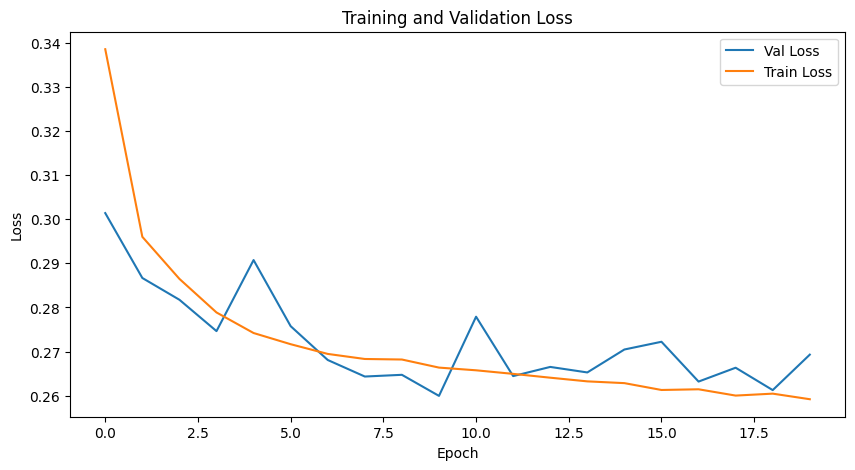

In [6]:
# Visualize training history
hist = pipeline.step_model_training.history[0]

plt.figure(figsize=(10, 5))
plt.plot(hist["val_loss"], label="Val Loss")
plt.plot(hist["train_loss"], label="Train Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


---

## 🧩 Pipeline Modules Overview

Let's explore each component of the pipeline in detail to understand how they work together.


#### 📂 Dataset Configuration



The `ParquetDatasetConfig` is always the first step in your pipeline. It defines how to load and filter your data:


```python
# Dataset Configuration Example
dataset_config = ParquetDatasetConfig(
    path="../../dataset",                   # Path to your parquet files
    split=None,                             # Train/test split ratio (e.g., 0.8 for 80/20)
    force_download=False,                   # Whether to download the dataset
    columns=["T-JUS-CKP", "T-MON-CKP"],     # Features to use
    target_column="class",                  # Target variable column name
    target_class=[0, 1],                    # Classes to include (for binary classification)
)

print("Dataset Configuration:")
print(f"Path: {dataset_config.path}")
print(f"Columns: {dataset_config.columns}")
print(f"Target classes: {dataset_config.target_class}")
```


#### ⚙️ Preprocessing Steps

You can chain multiple preprocessing steps. They will be executed in the order they appear:


```python
# Handle missing values
impute_config = ImputeMissingConfig(
    strategy="median",  # Options: "mean", "median", "forward", "backward"
    columns=["T-JUS-CKP"],  # Specific columns to impute
)

# Normalize the data
normalize_config = NormalizeConfig(
    norm="l2"  # Options: "l1", "l2", "max", "standard"
)

# Create time windows
windowing_config = WindowingConfig(
    window_size=100  # Number of time steps per window
)

print("Preprocessing Configuration:")
print(f"Imputation strategy: {impute_config.strategy}")
print(f"Normalization norm: {normalize_config.norm}")
print(f"Window size: {windowing_config.window_size}")
```

#### 🔎 Feature Extraction (Optional)

**Important:** Only one feature extraction method can be used at a time. Choose the one that best fits your problem:


```python
from ThreeWToolkit.core.base_feature_extractor import (
    StatisticalConfig,
    EWStatisticalConfig,
    WaveletConfig,
)

# Option A: Statistical Features
# Extracts basic statistical features like mean, standard deviation, min, max, etc.
statistical_config = StatisticalConfig()

# Option B: Exponentially Weighted Statistical Features
# Extracts statistical features with exponential weighting, giving more importance to recent values
ew_config = EWStatisticalConfig(
    selected_features=["ew_mean", "ew_std", "ew_skew"],         # Features to extract
    overlap=0.5,                                                # Window overlap (0.5 = 50% overlap)
    offset=0,                                                   # Starting offset
    decay=0.9,                                                  # Exponential decay factor (higher = more weight on recent values)
    eps=1e-8,                                                   # Small constant for numerical stability
)

# Option C: Wavelet Features
# Extracts features using wavelet decomposition
wavelet_config = WaveletConfig(
    level=3,                # Decomposition level
    overlap=0.5,            # Window overlap
    offset=0,               # Starting offset
    wavelet="haar",         # Wavelet type: "haar", "db4", "sym4", etc.
)

print("Feature Extraction Options:")
print("1. Statistical Features: Basic statistical properties")
print("2. EW Statistical Features: Exponentially weighted statistics")
print("3. Wavelet Features: Frequency domain decomposition")
```

#### 🤖 Model Training

Configure how your model will be trained:


```python
# Model configuration
model_config = MLPConfig(
    hidden_sizes=(64, 32),
    output_size=2,
    random_seed=42,
    activation_function="relu",
    regularization=None,
)

# Training configuration
trainer_config = TrainerConfig(
    optimizer="adam",                       # Options: "adam", "sgd", "rmsprop"
    criterion="cross_entropy",              # Loss function
    batch_size=32,                          # Number of samples per batch
    epochs=20,                              # Number of training epochs
    seed=42,                                # Random seed for reproducibility
    config_model=model_config,              # Model architecture configuration
    learning_rate=0.001,                    # Learning rate
    cross_validation=False,                 # Whether to use cross-validation
    shuffle_train=True,                     # Whether to shuffle training data
)

print("Model Configuration:")
print(f"Hidden sizes: {model_config.hidden_sizes}")
print(f"Output size: {model_config.output_size}")
print(f"Activation: {model_config.activation_function}")

print("\nTraining Configuration:")
print(f"Optimizer: {trainer_config.optimizer}")
print(f"Batch size: {trainer_config.batch_size}")
print(f"Epochs: {trainer_config.epochs}")
print(f"Learning rate: {trainer_config.learning_rate}")
```

#### 📈 Model Assessment

Define how to evaluate your model:


```python
# Model assessment configuration
assessment_config = ModelAssessmentConfig(
    metrics=["balanced_accuracy", "precision", "recall", "f1"],
    task_type=TaskType.CLASSIFICATION,                                  # Or TaskType.REGRESSION
    export_results=True,                                                # Save results to file
    generate_report=True ,                                              # Generate detailed HTML report
)

print("Assessment Configuration:")
print(f"Metrics: {assessment_config.metrics}")
print(f"Task type: {assessment_config.task_type}")
print(f"Export results: {assessment_config.export_results}")
print(f"Generate report: {assessment_config.generate_report}")
```

#### 🔧 Complete Pipeline Examples

Let's see some complete pipeline examples with different configurations:


**Example 1: Pipeline with Statistical Features**


```python
# Example 1: Pipeline with Statistical Features
config_model_stats = MLPConfig(
    hidden_sizes=(128, 64, 32),
    output_size=3,
    random_seed=42,
    activation_function="relu",
    regularization=None,
)

pipeline_stats = Pipeline(
    [
        ParquetDatasetConfig(
            path=dataset_path,
            split=0.8,
            force_download=False,
            columns=["T-JUS-CKP", "T-MON-CKP", "P-PDG"],
            target_column="class",
            target_class=[0, 1, 2],
        ),
        ImputeMissingConfig(strategy="mean", columns=None),  # Impute all columns
        NormalizeConfig(norm="standard"),
        WindowingConfig(window_size=150),
        StatisticalConfig(),  # Extract statistical features
        TrainerConfig(
            optimizer="adam",
            criterion="cross_entropy",
            batch_size=64,
            epochs=50,
            seed=42,
            config_model=config_model_stats,
            learning_rate=0.0005,
            cross_validation=True,
            shuffle_train=True,
        ),
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "precision", "recall", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=True,
        ),
    ]
)

print("Pipeline with Statistical Features created successfully!")
print("This pipeline will:")
print("1. Load dataset with 3 classes")
print("2. Apply mean imputation to all columns")
print("3. Standardize the data")
print("4. Create windows of size 150")
print("5. Extract statistical features")
print("6. Train MLP with cross-validation")
print("7. Generate comprehensive assessment report")
```

**Example 2: Pipeline with Wavelet Features**


```python
# Example 2: Pipeline with Wavelet Features
config_model_wavelet = MLPConfig(
    hidden_sizes=(64, 32),
    output_size=2,
    random_seed=11,
    activation_function="tanh",
    regularization="l2",
)

pipeline_wavelet = Pipeline(
    [
        ParquetDatasetConfig(
            path=dataset_path,
            split=0.7,
            columns=["T-JUS-CKP", "T-MON-CKP"],
            target_column="class",
            target_class=[0, 1],
        ),
        ImputeMissingConfig(strategy="forward", columns=["T-JUS-CKP", "T-MON-CKP"]),
        NormalizeConfig(norm="l2"),
        WindowingConfig(window_size=200),
        WaveletConfig(
            level=4,
            overlap=0.5,
            offset=0,
            wavelet="db4",  # Daubechies wavelet
        ),
        TrainerConfig(
            optimizer="sgd",
            criterion="cross_entropy",
            batch_size=16,
            epochs=30,
            seed=11,
            config_model=config_model_wavelet,
            learning_rate=0.01,
            cross_validation=False,
            shuffle_train=True,
        ),
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=True,
        ),
    ]
)

print("Pipeline with Wavelet Features created successfully!")
print("This pipeline will:")
print("1. Load dataset with 2 classes")
print("2. Apply forward imputation to specific columns")
print("3. Apply L2 normalization")
print("4. Create windows of size 200")
print("5. Extract wavelet features using Daubechies wavelet")
print("6. Train MLP with SGD optimizer")
print("7. Generate assessment with balanced accuracy and F1 metrics")
```

**Example 3: Minimal Pipeline**


```python
# Example 3: Minimal Pipeline
config_model_minimal = MLPConfig(
    hidden_sizes=(32, 16),
    output_size=3,
    random_seed=42,
    activation_function="relu",
    regularization=None,
)

pipeline_minimal = Pipeline(
    [
        ParquetDatasetConfig(
            path=dataset_path,
            split=None,
            columns=["T-JUS-CKP", "T-MON-CKP"],
            target_column="class",
            target_class=[0, 1, 2],
        ),
        WindowingConfig(window_size=200),
        TrainerConfig(
            optimizer="adam",
            criterion="cross_entropy",
            batch_size=32,
            epochs=20,
            seed=42,
            config_model=config_model_minimal,
            learning_rate=0.001,
            cross_validation=False,
            shuffle_train=True,
        ),
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "precision", "recall", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=False,
        ),
    ]
)

print("Minimal Pipeline created successfully!")
print("This pipeline will:")
print("1. Load dataset with 3 classes")
print("2. Create windows of size 200")
print("3. Train MLP directly on windowed data")
print("4. Generate basic assessment")
```

---

## 📊 Report Generation

The `3WToolkit` provides a `ReportGeneration` module to automatically create comprehensive HTML or LaTeX reports from model evaluation results. This feature simplifies the process of documenting, sharing, and communicating model performance in a standardized format.

The `ReportGeneration` class takes the results from the `ModelAssessment` step and compiles them into a structured report that includes:

- **Model and Dataset Information**: Details about the model, its configuration, and the dataset used.
- **Performance Metrics**: A summary of key metrics like accuracy, precision, recall, and F1-score.
- **Custom Plots**: The ability to include additional plots, such as feature importance or prediction visualizations.

Reports can be generated in two formats: LaTeX (Beamer) for presentations and HTML for web viewing.

#### **Initialization - Main Parameters**

```python
report = ReportGeneration(
    model=your_model,                    # Trained model
    X_train=X_train,                     # Training data (pd.Series)
    y_train=y_train,                     # Training labels (pd.Series)
    X_test=X_test,                       # Test data (pd.Series)
    y_test=y_test,                       # Test labels (pd.Series)
    predictions=predictions,             # Model predictions (pd.Series)
    calculated_metrics=metrics_dict,     # Dictionary with calculated metrics
    plot_config=plot_config,             # Visualization configuration
    title="My Report",                   # Report title
    author="Author Name",                # Author (default: "3W Toolkit Report")
    export_report_after_generate=False   # If True, automatically saves
)
```

#### **Metrics Structure**

The ``calculated_metrics`` dictionary should contain pre-calculated metrics:

```python
calculated_metrics = {
    "accuracy": 0.95,
    "precision": 0.93,
    "recall": 0.94,
    "f1": 0.93,
    "get_roc_auc": 0.96
}
```

#### **Visualization Configuration**

The class supports 6 types of charts through the plot_config parameter:

```Python
plot_config = {
    "PlotSeries": {
        "series": your_series,
        "title": "Time Series"
    },
    "PlotMultipleSeries": {
        "series_list": [series1, series2],
        "title": "Series Comparison"
    },
    "PlotCorrelationHeatmap": {
        "df_of_series": dataframe,
        "title": "Feature Correlation"
    },
    "PlotFFT": {
        "series": your_series,
        "title": "Frequency Analysis"
    },
    "SeasonalDecompose": {
        "series": your_series,
        "title": "Seasonal Decomposition"
    },
    "PlotWaveletSpectrogram": {
        "series": your_series,
        "title": "Wavelet Spectrogram"
    }
}
```

#### **Report Generation**

**I. LaTeX (Beamer) Format**

Generates a professional Beamer presentation with:

Slide 1 - Title: Uses the "petro" theme with custom background

Slide 2 - Performance Evaluation: Table with all calculated metrics

Slide 3 - Model Overview:

* Model type and parameter configuration
* Dataset statistics (number of training/test samples)

Slides 4+ - Visualizations: One slide for each configured plot

```python
# Generate (without auto-saving)
doc = report.generate_summary_report(format="latex")

# Save manually later
report.save_report(doc, filename="my_report", format="latex")
```

**Note:** *To save automatically after generation, set* `export_report_after_generate=True` *during initialization.*

**II. HTML Format**

Generates a web report using Jinja2 templates with the same information as the LaTeX version

```python
# Using default template (report_template.html)
html_content = report.generate_summary_report(format="html")

# Using custom template
html_content = report.generate_summary_report(
    format="html",
    template_name="my_custom_template.html"
)
```

#### **Usage Tips**

##### 1 - Integration with ``ModelAssessment``

The class is designed to receive results from ``ModelAssessment``. Use the already calculated metrics:

```python
# After running ModelAssessment
assessment = ModelAssessment(...)
metrics = assessment.calculate_metrics()

# Pass directly to ReportGeneration
report = ReportGeneration(
    ...,
    calculated_metrics=metrics,
    ...
)
```

##### 2 - Automatic Plot Validation

The class automatically validates plot configuration:

* Checks if plot names are valid
* Ensures required parameters are present
* Raises descriptive errors if there are issues

##### 3 - Relative Paths for Portability

All images use relative paths, allowing you to:

* Share the complete reports folder
* Compile LaTeX on different machines
* View HTML in any browser without configuration

##### 4 - Automatic Name Formatting

* Metric names are automatically converted: "get_roc_auc" → "ROC AUC"
* Model parameters are formatted: "learning_rate" → "Learning Rate"
* Long values are truncated to avoid layout issues

##### 5 - Model Requirements

The model must have a config attribute that can be iterated. The class accesses model.config to display parameters in the report.